# Modern Deep Learning: 
# Classify Fashion-MNIST with a simple CNN in Keras

Original version from https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a, adapted & extended by Xander Steenbrugge.
![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Jupyter Notebook?


*   Interactive programming in the web browser
*   Great for visualization
*   Great for collabration
*   Popular tool for studying machine learning / deep learning




## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Notebook Overview

This is a tutorial of how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras. 
Keras is now part of the core TensorFlow library, in addition to being an independent open source project. 

We will work our way to an efficiently regularized, convolutional network in small, incremental steps, starting from a simple, linear model and gradually adding more and more complexity to our neural network.


The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) data: 
60,000 train and 10,000 test data with 10 categories. Each gray-scale image is 28x28.

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale image is 28x28

# Setup
First, install TensorFlow version 1.8.0 and import the Fashion-MNIST dataset
We will also be using numpy, matplotlib and the native Keras package, so install those if you haven't already!

Check the requirements.txt file for all necessary dependencies!

In [0]:
#Test your imports:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

# 1 Data prep

## 1.0 Download the fashion_mnist data
Now, let's download fashion-mnist which is one of the Keras datasets: https://keras.io/datasets/
Pull the dataset from disk into cache memory by storing it in numpy arrays.
As a sanity check, print some shapes to make sure everything is as expected! You should have images of 28 by 28 pixels.

In [0]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train_data, y_train_data), (x_test_data, y_test_data) = tf.keras.datasets.fashion_mnist.load_data()
# Define the text labels:
dataset_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

#Print some shapes of the data:

## 1.1 Visualize the data
Before we start defining any models, lets have a look at our data to get a sense of what we're dealing with.
Use matplotlib to visualise some of the training images, can you identify the classes yourself?
Perhaps create a simple, callable function that plots a dataset image, given its index.

In [163]:
print(x_train_data.shape)
print(y_train_data.size)
print(x_test_data.shape)
print(y_test_data.size)
def plot_image(img_index):
    # y_train contains the lables, ranging from 0 to 9
    label_index = y_train_data[img_index]
    plt.imshow(x_train_data[img_index]/255, cmap = 'gray')
    plt.title("Image %d: %s" %(img_index, dataset_labels[label_index]))
x_train_data.min()
x_train_data.max()
x_test_data.min()
x_test_data.max()

(60000, 28, 28)
60000
(10000, 28, 28)
10000


255

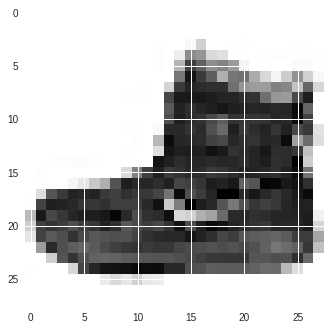

In [26]:
# x_train_data[1,:,:]
# plt.plot(x_train_data[1,:,:])
plt.imshow(x_train_data[0,:,:])

## 1.2 Data normalization
First investigate the range of the pixel values in the images: what are the min and max you find?

For a neural network to work well, we want these pixel values to be within the range 0-1. Rescale the image pixel values to make this so!

In [164]:
x_train_data_norm = x_train_data/(x_train_data.max()+0.0)
x_test_data_norm = x_test_data/(x_test_data.max()+0.0)
print(x_train_data_norm.max())
print(x_test_data_norm.max())

1.0
1.0


## 1.3 Split the data into train/validation/test data sets
In Machine Learning, we always want to be able to validate how well our model is doing on data it hasn't yet trained on.

*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.

Split off 10% of the training data and put this into the validation set!

In [0]:
validation_fraction = .1

## ToDo ##



(x_train, y_train) = (x_train_data_norm[0:int((1-validation_fraction
                                              )*x_train_data_norm.shape[0])
                                              ] ,  y_train_data[0:int((1-validation_fraction
                                              )*y_train_data.shape[0])])

(x_valid, y_valid) = (x_train_data_norm[int((1-validation_fraction
                                              )*x_train_data_norm.shape[0]):] ,  y_train_data[
                                              int((1-validation_fraction
                                              )*y_train_data.shape[0]):])

(x_test, y_test) = x_test_data_norm, y_test_data

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(54000, 28, 28)
(54000,)
(6000, 28, 28)
(6000,)


## 1.4 Some final preprocessing
Most image datasets consist of rgb images. Because of this, Keras will expect each image to have 3 dimensions: [x_pixels, y_pixels, color_channels]. Since our images are grayscale, the color dimension is equal to one and implicitly left out in the numpy arrays. Reshape the image data to contain an explicit color channel of dimension 1. (Your final numpy arrays should have the dimension [nr_samples, x_pixels, y_pixels, 1].)

Secondly, it is very common in deep learning to do classification tasks. To train our model, we will use the categorical crossentropy loss (see https://keras.io/losses/). To compute this, we have to format our image labels as one-hot-vectors. The easiest way to do this is with the tf.keras.utils.to_categorical() function, see: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical.

In [166]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28

#Reshape the data:
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (54000, 28, 28, 1) y_train shape: (54000, 10)
54000 train set
6000 validation set
10000 test set


# 2 Creating a model

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the models today, we will be using some of these Keras APIs: (you can check the documentation with these links:)
*   Dense()    [link text](https://keras.io/layers/core/) - Create a fully connected layer
*   Conv2D()   [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling()  [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout()  [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

## 2.0 Baseline: a simple linear model
As a first baseline, we will create a very simple, linear model consisting of one linear transformation matrix and train it with backpropagation.

*  To create the model object, use the tf.keras.Sequential() function as shown here: https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential.
Since we're not using convolutions for now, we can simply flatten all input pixels into a single row per image containing 28x28 pixel values.

*  Then add a single, linear layer that maps all these pixels onto the 10 output classes. Since the outputs represent class probabilities we can use a softmax activation at the output of our model.

*  You can print a description of your model using model.summary()

Extra question: what does the softmax activation actually do? How does this affect our training procedure?
Here is a good post explaining most of the details: https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

In [167]:
# Create the model:
model = tf.keras.Sequential()

# Flatten all the pixels (You must define the input shape in the first layer of the neural network)
# model.add(tf.keras.layers.Dense(10, input_shape=(784,)))
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Add one Dense layer mapping all those pixels onto 10 output classes (add a softmax activation):

# Take a look at the model summary:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer, we'll use adam
*   A loss function, we'll use the 'categorical_crossentropy'
*   A list of metrics, here we'll start with 'accuracy'

See https://keras.io/models/model/ for details.

In [0]:
#Compile the model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.

You will also have to configure the batch-size and the number of epochs to train for.
What do these words mean exactly?

In [169]:
import keras.callbacks
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_valid,y_valid), callbacks=[checkpointer])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
52608/54000 [============================>.] - ETA: 0s - loss: 0.7718 - acc: 0.7445
Epoch 00001: val_loss improved from inf to 0.56086, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 4s 73us/step - loss: 0.7671 - acc: 0.7462 - val_loss: 0.5609 - val_acc: 0.8088
Epoch 2/10
53888/54000 [============================>.] - ETA: 0s - loss: 0.5269 - acc: 0.8258
Epoch 00002: val_loss improved from 0.56086 to 0.48919, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 2s 42us/step - loss: 0.5267 - acc: 0.8259 - val_loss: 0.4892 - val_acc: 0.8355
Epoch 3/10
53888/54000 [============================>.] - ETA: 0s - loss: 0.4816 - acc: 0.8385
Epoch 00003: val_loss improved from 0.48919 to 0.46180, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 2s 42us/step - loss: 0.4815 - acc: 0.8386 - val_loss: 0.4618 - val_acc: 0.8433
Epoc

## Load Model with the best validation accuracy
Use the .load_weights() function for this!

In [0]:
# Load the weights with the best validation accuracy:
model.load_weights('model.weights.best.hdf5')

## Test Accuracy
Since we used our validation set to choose the best model, we are implicitly already overfitting on this subset of the data. To get the final accuracy estimate our model would get on completely unseen data, compute the accuracy on the test set! Use the .evaluate() function for this.

In [71]:
# Evaluate the model on test set, and print the accuracy you get:
score = model.evaluate(x=x_test, y=y_test, batch_size=128)

10000/10000 [==============================] - 0s 20us/step


In [72]:
print('Test accuracy: %.2f%%' %(100*score[1])) 

Test accuracy: 84.54%


## Visualize prediction
Now let's visualize the predictions from the model you just trained. 
First we get the predictions with the model from the test data.
Then we visualize some images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.
Package everything in a nice, callable function 'visualize_model_predictions(model, x, y)'

In [0]:
def visualize_model_predictions(model_object, x, y,title_string):
  y_hat = model.predict(x)
  
  fig=plt.figure(figsize=(20, 8))
  columns = 8
  rows = 4
  for i, index in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[index]), cmap = 'gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(dataset_labels[predict_index], 
                                      dataset_labels[true_index]),
                                      color=("green" if predict_index == true_index else "red"))
    fig.suptitle("%s results:" %title_string, fontsize=25)
    

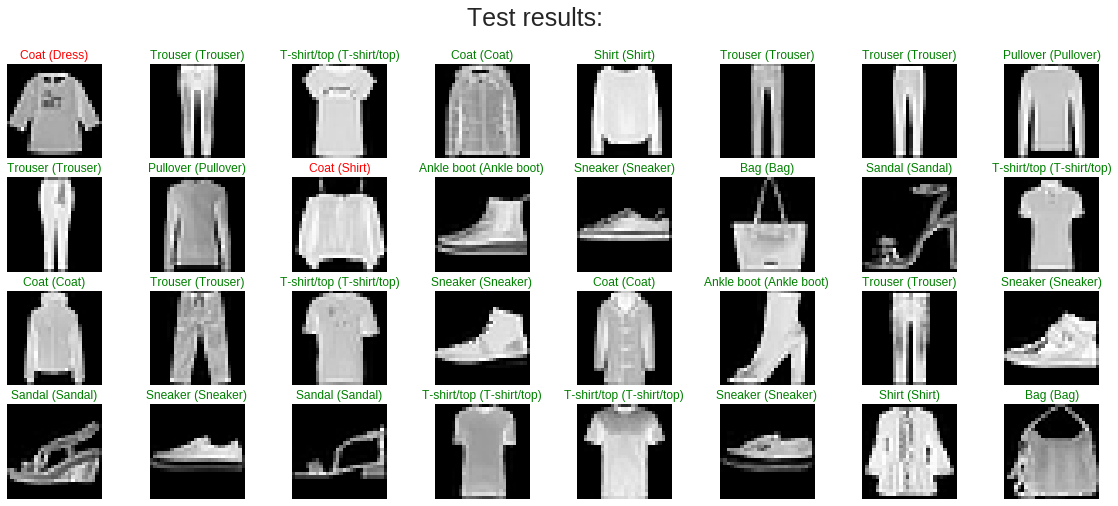

In [76]:
visualize_model_predictions(model, x_test, y_test , 'Test')        

## Extra Assignment:
Visualise what this single, linear layer has learned to detect for each class by plotting the weights of trained network.
Our transformation layer is a weight matrix of dimension [28x28, 10]. In a sense, it has learned a 'filter' for each of the 10 classes. Try to plot what these 10 filters look like, by reshaping them into 28x28 images and visualising the results for each class with matplotlib.imshow().

To get the weight matrix of your trained model, you can use the model.layers and .get_weights() functions.

## Extra Assignment 2:
Compare the filters you just plotted with the average image for each class, do you notice any differences? Why?

Found FC Layer!


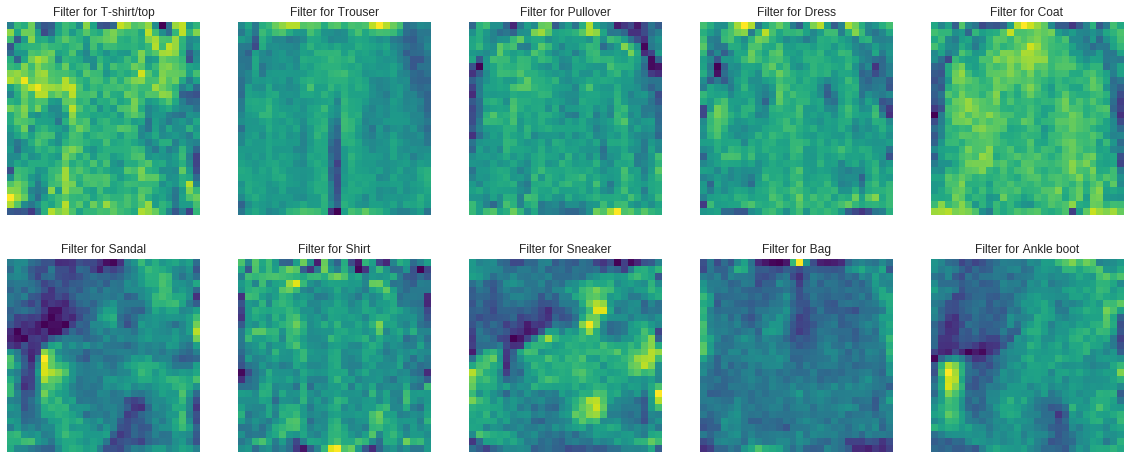

In [171]:
#Weights = model.layers[1].get_weights()[0]
#fig = plt.figure(figsize=(20,8))
#for i 
#plt.imshow(Weights[:,0].reshape(28,28))
for layer in model.layers:
    weights = layer.get_weights()
    if len(weights) > 0:
        print("Found FC Layer!")
        w,b = weights
        filters = np.reshape(w, (28,28,10))
        
def visualize_filters(filters, title_string):
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
        ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(filters[:,:,i], cmap = 'viridis')
        ax.set_title("%s for %s" %(title_string, dataset_labels[i]))


visualize_filters(filters, 'Filter')


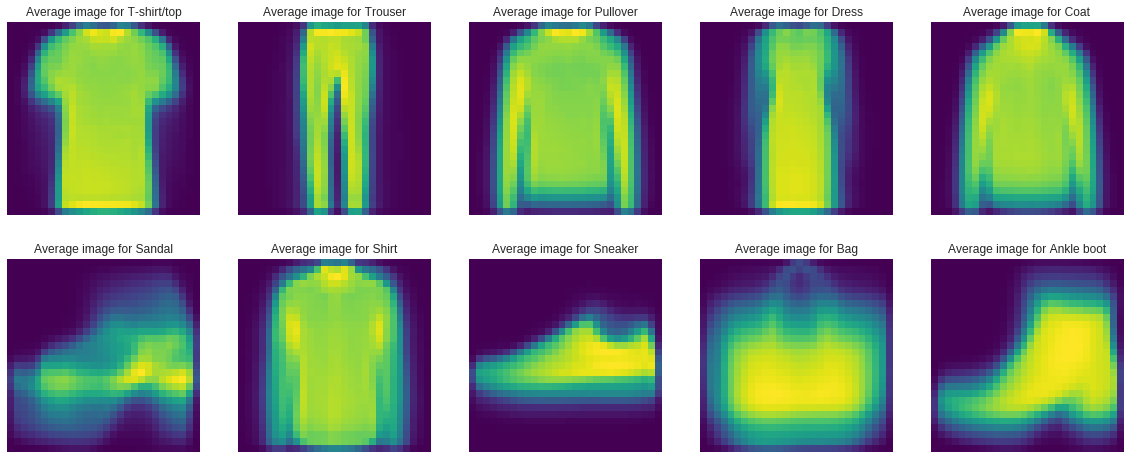

In [172]:
avg_images = np.zeros((28,28,1,10))
class_images = [0]*10

for i in range(len(x_train)):
    img = x_train[i]
    label = np.argmax(y_train[i])
    
    avg_images[:,:,:,label] += img
    class_images[label] += 1

for i in range(10):
    avg_images[:,:,:,i] = avg_images[:,:,:,i]/class_images[i]

avg_images = np.squeeze(avg_images)
visualize_filters(avg_images, 'Average image')


## Extra assignment 3:
Change the code in block 1.0 to work with MNIST instead of Fashion-MNIST (everything else can stay the same). Rerun all the code you've written so far.

What Test-accuracy do you get with a simple, linear model? Can you see now why MNIST is gradually losing favor as a benchmarking dataset? What about the filter visualisations VS the average images, they look interesting right? Try to think about what exactly is going on here...

In [0]:
# dataset_to_use = 'mnist' #'mnist' or ‘fashion-mnist’

# if dataset_to_use == 'fashion-mnist':
#     # Load the fashion-mnist pre-shuffled train data and test data
#     (x_train_data, y_train_data), (x_test_data, y_test_data) = tf.keras.datasets.fashion_mnist.load_data()
#     # Define the text labels:
#     dataset_labels = ["T-shirt/top",  # index 0
#                             "Trouser",      # index 1
#                             "Pullover",     # index 2 
#                             "Dress",        # index 3 
#                             "Coat",         # index 4
#                             "Sandal",       # index 5
#                             "Shirt",        # index 6 
#                             "Sneaker",      # index 7 
#                             "Bag",          # index 8 
#                             "Ankle boot"]   # index 9
# else:
#     (x_train_data, y_train_data), (x_test_data, y_test_data) = tf.keras.datasets.mnist.load_data()
#     # Define the text labels:
#     dataset_labels = ["0",  # index 0
#                             "1",  # index 1
#                             "2",  # index 2 
#                             "3",  # index 3 
#                             "4",  # index 4
#                             "5",  # index 5
#                             "6",  # index 6 
#                             "7",  # index 7 
#                             "8",  # index 8 
#                             "9"]  # index 9

# #Print the shapes of the dataset:
# print("x_train shape:", x_train_data.shape, "y_train shape:", y_train_data.shape)


# 2.1 Let's turn this into a real neural network!
Add a single hidden layer to the model and add an activation function after that layer (eg 'relu').
The number of hidden units in this layer is usually something in between the input dimension (28x28) and the output dimension (10). Play around with the activation function and the number of hidden units, how do they affect the models performance / training speed?

In [112]:
model = tf.keras.Sequential()

# Flatten --> Dense_Relu --> Dense_Softmax:
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary:
model.summary()

#Compile the model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [113]:
## Add a checkpointer and fit the model on the train data: (you have already done this, see above!)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_valid,y_valid), callbacks=[checkpointer])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
52864/54000 [============================>.] - ETA: 0s - loss: 0.6845 - acc: 0.7754
Epoch 00001: val_loss improved from inf to 0.48608, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 52us/step - loss: 0.6799 - acc: 0.7767 - val_loss: 0.4861 - val_acc: 0.8292
Epoch 2/10
53888/54000 [============================>.] - ETA: 0s - loss: 0.4569 - acc: 0.8430
Epoch 00002: val_loss improved from 0.48608 to 0.42460, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 48us/step - loss: 0.4567 - acc: 0.8430 - val_loss: 0.4246 - val_acc: 0.8510
Epoch 3/10
53376/54000 [============================>.] - ETA: 0s - loss: 0.4219 - acc: 0.8536
Epoch 00003: val_loss did not improve from 0.42460
54000/54000 [==============================] - 3s 47us/step - loss: 0.4214 - acc: 0.8539 - val_loss: 0.4281 - val_acc: 0.8507
Epoch 4/10
53504/54000 [=========================

## Evaluation
Load the best model (according to the validation set) and compute the test accuracy. Re-use your 'visuzalize_model_predictions()' function to display some results.

**Extra question:** Why can't we also visualise the filters learned by this neural network with one hidden layer? What's the problem in this case? Notice how this gives rise to the whole "interpretability" problem in Deep Learning.

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 86.14%


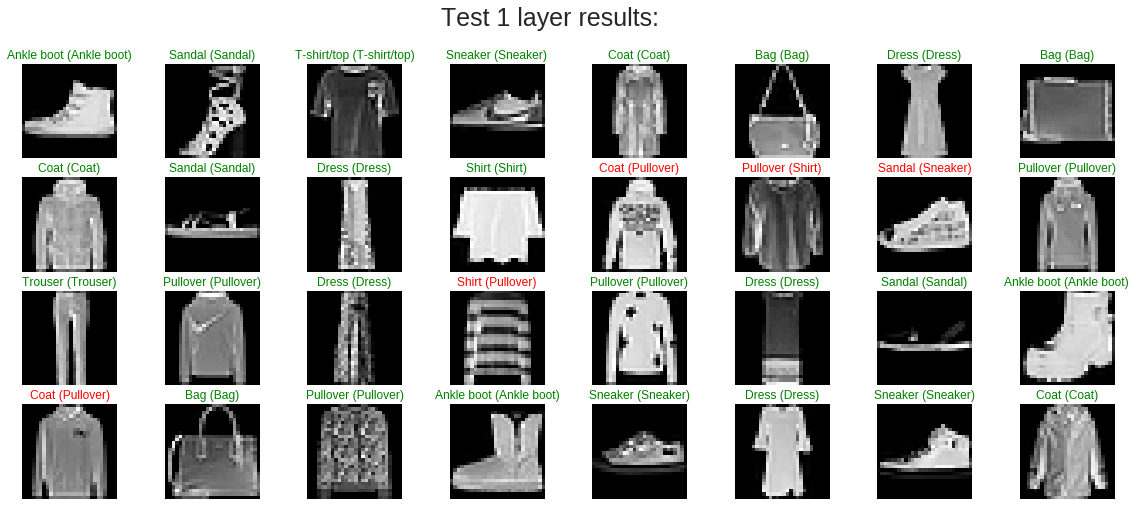

In [115]:
## Load the best model:
model.load_weights('model.weights.best.hdf5')
## Get test predictions:
score = model.evaluate(x=x_test, y=y_test, batch_size=128)
print('Test accuracy: %.2f%%' %(100*score[1])) 

## Visualise some results:
visualize_model_predictions(model, x_test, y_test, 'Test 1 layer')

## 2.2 Let's make our model Deeper! 
Add two extra hidden layers to start with.
Explore the effects of adding more depth/width to your network, what happens to the number of trainable parameters?
What about training speed, test-accuracy, ... Notice that there usually is a clear tradeoff between training-time and model performance.

In [116]:
model = tf.keras.Sequential()

# Define the model architecture:
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


# Adding callbacks
Because we just made our model a lot deeper, it will have to train longer in order to use its full potential!
But obviously, we don't want to keep training too long or we'll overfit.
To get more info during training we'll add two extra callbacks to the model.fit() method that:
1. Stop the model training loop if the validation loss keeps dropping consistently (eg 10 times in a row) (This is a default callback, available in Keras)
2. Periodically visualise the validation error while training (This is a custom callback function you will have to create yourself)

You can find more documentation here: https://keras.io/callbacks/ (For the custom callback, scroll down to "Create a callback" section)

In [0]:
class plot_train_progress(keras.callbacks.Callback):
    def __init__(self, plot_every_n_epochs=5, plot_fraction=0.9):
        #Class attributes eg 'self.plot_frequency'
        self.plot_frequency = plot_every_n_epochs
        self.plot_fraction = plot_fraction
        
    def on_train_begin(self, logs={}):
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.plot_frequency == 0:
            #plot the training progress:
            nr_values_to_plot = int(self.plot_fraction*len(self.train_losses))
            if nr_values_to_plot>1:
                t= list(range(nr_values_to_plot))
                plt.plot(t, self.train_losses[-nr_values_to_plot:], 'b')
                plt.plot(t, self.val_losses[-nr_values_to_plot:], 'g')
                plt.xlabel('# Batches')
                plt.ylabel('Validation Loss')
                plt.show()

    def on_batch_end(self, batch, logs={}):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# Early stopping callback:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, verbose=1, mode='min')

# Checkpointer callback:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

# Plot_train_progress callback:
plot_train_progress_cb = plot_train_progress(5,0.9)

callbacks_list = [checkpointer, plot_train_progress_cb, earlyStopping]

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
53632/54000 [============================>.] - ETA: 0s - loss: 0.5827 - acc: 0.8018
Epoch 00001: val_loss improved from inf to 0.45869, saving model to model.weights.best.hdf5


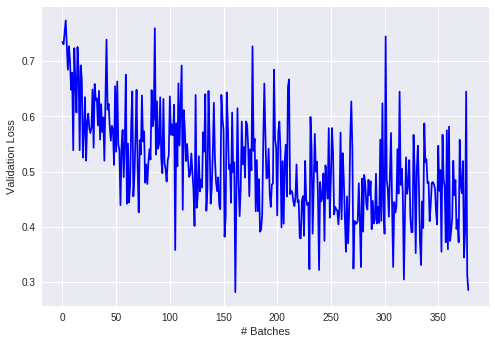

54000/54000 [==============================] - 3s 62us/step - loss: 0.5816 - acc: 0.8022 - val_loss: 0.4587 - val_acc: 0.8362
Epoch 2/25
53248/54000 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8548
Epoch 00002: val_loss improved from 0.45869 to 0.39407, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 53us/step - loss: 0.4140 - acc: 0.8549 - val_loss: 0.3941 - val_acc: 0.8573
Epoch 3/25
52992/54000 [============================>.] - ETA: 0s - loss: 0.3663 - acc: 0.8703
Epoch 00003: val_loss improved from 0.39407 to 0.37498, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 53us/step - loss: 0.3665 - acc: 0.8704 - val_loss: 0.3750 - val_acc: 0.8643
Epoch 4/25
53504/54000 [============================>.] - ETA: 0s - loss: 0.3445 - acc: 0.8758
Epoch 00004: val_loss improved from 0.37498 to 0.36083, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s

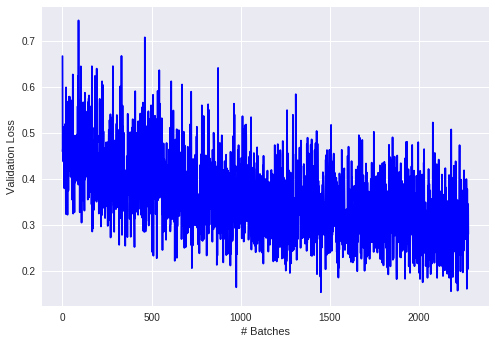

54000/54000 [==============================] - 3s 56us/step - loss: 0.3070 - acc: 0.8874 - val_loss: 0.3463 - val_acc: 0.8728
Epoch 7/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8926
Epoch 00007: val_loss improved from 0.34632 to 0.33595, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 52us/step - loss: 0.2913 - acc: 0.8926 - val_loss: 0.3359 - val_acc: 0.8783
Epoch 8/25
53504/54000 [============================>.] - ETA: 0s - loss: 0.2770 - acc: 0.8987
Epoch 00008: val_loss did not improve from 0.33595
54000/54000 [==============================] - 3s 52us/step - loss: 0.2770 - acc: 0.8988 - val_loss: 0.3489 - val_acc: 0.8767
Epoch 9/25
53120/54000 [============================>.] - ETA: 0s - loss: 0.2698 - acc: 0.9006
Epoch 00009: val_loss improved from 0.33595 to 0.32913, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 52us/step - loss: 0.2698 - acc: 0.9006 - val

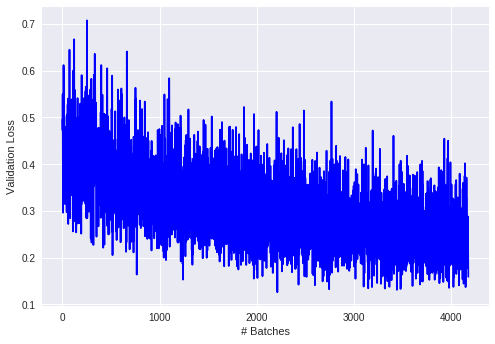

54000/54000 [==============================] - 3s 57us/step - loss: 0.2514 - acc: 0.9070 - val_loss: 0.3190 - val_acc: 0.8867
Epoch 12/25
53376/54000 [============================>.] - ETA: 0s - loss: 0.2458 - acc: 0.9089
Epoch 00012: val_loss did not improve from 0.31782
54000/54000 [==============================] - 3s 51us/step - loss: 0.2457 - acc: 0.9090 - val_loss: 0.3263 - val_acc: 0.8860
Epoch 13/25
53632/54000 [============================>.] - ETA: 0s - loss: 0.2353 - acc: 0.9129
Epoch 00013: val_loss improved from 0.31782 to 0.31729, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 52us/step - loss: 0.2353 - acc: 0.9129 - val_loss: 0.3173 - val_acc: 0.8893
Epoch 14/25
52992/54000 [============================>.] - ETA: 0s - loss: 0.2301 - acc: 0.9143
Epoch 00014: val_loss improved from 0.31729 to 0.31671, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 3s 51us/step - loss: 0.2294 - acc: 0.9146 - 

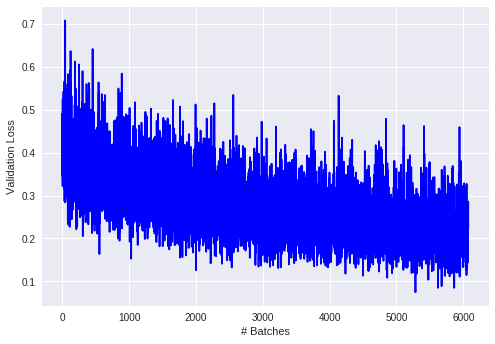

54000/54000 [==============================] - 3s 56us/step - loss: 0.2171 - acc: 0.9191 - val_loss: 0.3455 - val_acc: 0.8830
Epoch 17/25
53888/54000 [============================>.] - ETA: 0s - loss: 0.2103 - acc: 0.9214
Epoch 00017: val_loss did not improve from 0.31522
54000/54000 [==============================] - 3s 51us/step - loss: 0.2106 - acc: 0.9212 - val_loss: 0.3212 - val_acc: 0.8872
Epoch 18/25
53376/54000 [============================>.] - ETA: 0s - loss: 0.2065 - acc: 0.9231
Epoch 00018: val_loss did not improve from 0.31522
54000/54000 [==============================] - 3s 50us/step - loss: 0.2065 - acc: 0.9230 - val_loss: 0.3359 - val_acc: 0.8875
Epoch 19/25
53504/54000 [============================>.] - ETA: 0s - loss: 0.1988 - acc: 0.9266
Epoch 00019: val_loss did not improve from 0.31522
54000/54000 [==============================] - 3s 51us/step - loss: 0.1987 - acc: 0.9267 - val_loss: 0.3215 - val_acc: 0.8898
Epoch 20/25
53248/54000 [============================>.

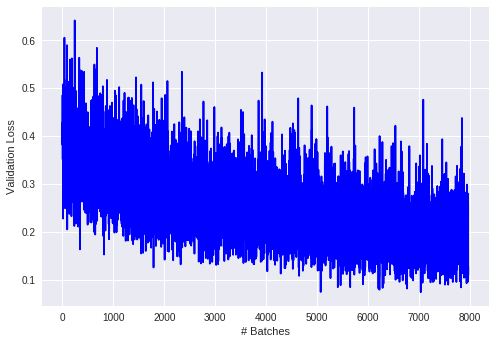

54000/54000 [==============================] - 3s 56us/step - loss: 0.1889 - acc: 0.9292 - val_loss: 0.3425 - val_acc: 0.8865
Epoch 22/25
53632/54000 [============================>.] - ETA: 0s - loss: 0.1884 - acc: 0.9300
Epoch 00022: val_loss did not improve from 0.31522
54000/54000 [==============================] - 3s 51us/step - loss: 0.1883 - acc: 0.9300 - val_loss: 0.3328 - val_acc: 0.8923
Epoch 23/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.1843 - acc: 0.9313
Epoch 00023: val_loss did not improve from 0.31522
54000/54000 [==============================] - 3s 51us/step - loss: 0.1843 - acc: 0.9313 - val_loss: 0.3431 - val_acc: 0.8850
Epoch 24/25
53504/54000 [============================>.] - ETA: 0s - loss: 0.1793 - acc: 0.9335
Epoch 00024: val_loss did not improve from 0.31522
54000/54000 [==============================] - 3s 51us/step - loss: 0.1793 - acc: 0.9335 - val_loss: 0.3808 - val_acc: 0.8803
Epoch 25/25
52992/54000 [============================>.

In [118]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=25,
         validation_data=(x_valid, y_valid),
         callbacks=callbacks_list)

## Evaluate the model

In [119]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy: %.2f%%' %(100*score[1]))

Test accuracy: 88.41%


**Extra:** To experiment and get some intuition as to why making the network deeper makes it easier to fit the data, you can experiment with this amazing in-browser tool: https://playground.tensorflow.org/

## 2.2 Convolutions 
### Lets add in some of the big guns in Computer Vision: Convolutions!

Notice that up until now, we've always started our network with a Flatten() operation that basically throws away all the spatial dependency information in our image. Time to change that!

Chain two Conv2D layers in the beginning of the network (remove the Flatten operation) and follow each one with a MaxPooling2D layer to downscale the resolution of the hidden representations. Finally add some normal FC layers to map the convolutional features to the output classes. (You will need to re-add a Flatten() operation for this).
Play around with different architectures and keep track of the following variables:
- Total number of trainable parameters in the network
- Network depth (how many non-linear layers do I have that transform the data from pixel-space to label-space?)
- Training time per epoch
- Final accuracy after training for N epochs

You can find the documentation for the Conv2D layers here: https://keras.io/layers/convolutional/

**Extra question:** What does the MaxPooling2D operation do exactly? Do we lose any information in this step? What is good/bad about that?

In [130]:
model = tf.keras.Sequential()

# Define the model:
model.add(tf.keras.layers.Conv2D(64, 2, 2,input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, 4, 2, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          32800     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               147584    
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 185,162
Trainable params: 185,162
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.5678 - acc: 0.7980
Epoch 00001: val_loss did not improve from 0.25272


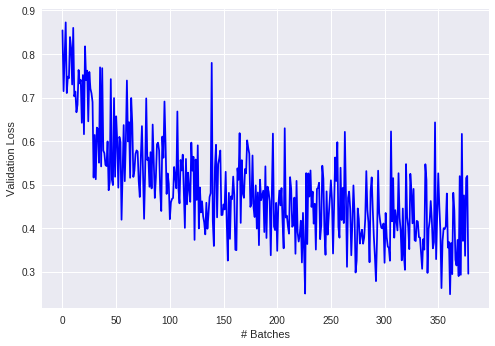

54000/54000 [==============================] - 5s 99us/step - loss: 0.5672 - acc: 0.7982 - val_loss: 0.4195 - val_acc: 0.8423
Epoch 2/25
53376/54000 [============================>.] - ETA: 0s - loss: 0.3651 - acc: 0.8686
Epoch 00002: val_loss did not improve from 0.25272
54000/54000 [==============================] - 4s 82us/step - loss: 0.3642 - acc: 0.8690 - val_loss: 0.3381 - val_acc: 0.8733
Epoch 3/25
53504/54000 [============================>.] - ETA: 0s - loss: 0.3115 - acc: 0.8871
Epoch 00003: val_loss did not improve from 0.25272
54000/54000 [==============================] - 4s 82us/step - loss: 0.3116 - acc: 0.8871 - val_loss: 0.3071 - val_acc: 0.8867
Epoch 4/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.2809 - acc: 0.8975
Epoch 00004: val_loss did not improve from 0.25272
54000/54000 [==============================] - 4s 81us/step - loss: 0.2806 - acc: 0.8975 - val_loss: 0.2932 - val_acc: 0.8902
Epoch 5/25
53632/54000 [============================>.] - 

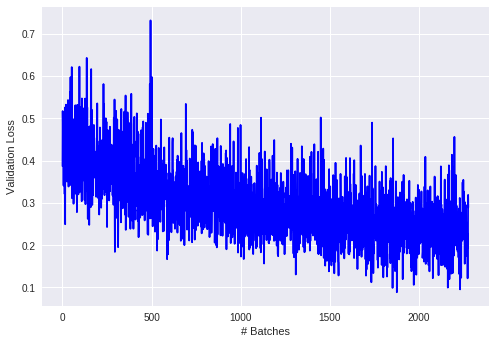

54000/54000 [==============================] - 5s 86us/step - loss: 0.2366 - acc: 0.9127 - val_loss: 0.2632 - val_acc: 0.9043
Epoch 7/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.2212 - acc: 0.9170
Epoch 00007: val_loss did not improve from 0.25272
54000/54000 [==============================] - 4s 82us/step - loss: 0.2209 - acc: 0.9172 - val_loss: 0.2654 - val_acc: 0.9018
Epoch 8/25
53632/54000 [============================>.] - ETA: 0s - loss: 0.2047 - acc: 0.9235
Epoch 00008: val_loss did not improve from 0.25272
54000/54000 [==============================] - 4s 82us/step - loss: 0.2049 - acc: 0.9234 - val_loss: 0.2573 - val_acc: 0.9045
Epoch 9/25
53376/54000 [============================>.] - ETA: 0s - loss: 0.1915 - acc: 0.9291
Epoch 00009: val_loss improved from 0.25272 to 0.25147, saving model to model.weights.best.hdf5
54000/54000 [==============================] - 5s 89us/step - loss: 0.1916 - acc: 0.9291 - val_loss: 0.2515 - val_acc: 0.9083
Epoch 10/25
5

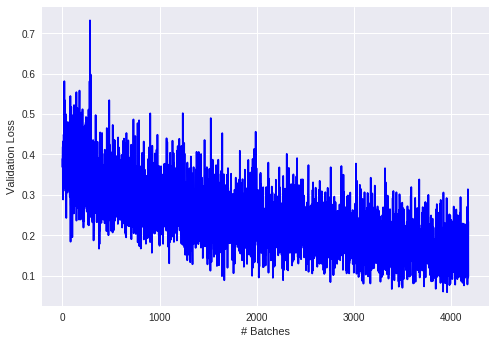

54000/54000 [==============================] - 5s 86us/step - loss: 0.1646 - acc: 0.9385 - val_loss: 0.2594 - val_acc: 0.9075
Epoch 12/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.1504 - acc: 0.9444
Epoch 00012: val_loss did not improve from 0.25147
54000/54000 [==============================] - 4s 82us/step - loss: 0.1505 - acc: 0.9444 - val_loss: 0.2674 - val_acc: 0.9120
Epoch 13/25
53888/54000 [============================>.] - ETA: 0s - loss: 0.1393 - acc: 0.9469
Epoch 00013: val_loss did not improve from 0.25147
54000/54000 [==============================] - 4s 81us/step - loss: 0.1393 - acc: 0.9469 - val_loss: 0.2833 - val_acc: 0.9027
Epoch 14/25
53760/54000 [============================>.] - ETA: 0s - loss: 0.1248 - acc: 0.9547
Epoch 00014: val_loss did not improve from 0.25147
54000/54000 [==============================] - 4s 82us/step - loss: 0.1249 - acc: 0.9547 - val_loss: 0.2785 - val_acc: 0.9120
Epoch 15/25
53760/54000 [============================>.

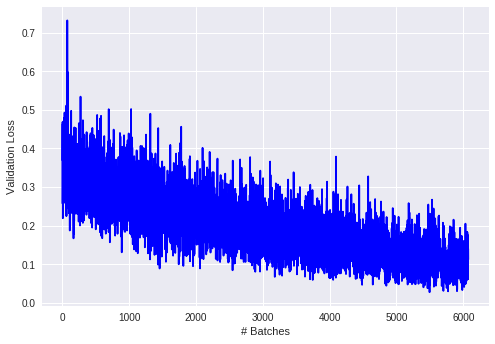

54000/54000 [==============================] - 5s 87us/step - loss: 0.1038 - acc: 0.9620 - val_loss: 0.2899 - val_acc: 0.9080
Epoch 17/25
53888/54000 [============================>.] - ETA: 0s - loss: 0.0947 - acc: 0.9650
Epoch 00017: val_loss did not improve from 0.25147
54000/54000 [==============================] - 4s 82us/step - loss: 0.0947 - acc: 0.9650 - val_loss: 0.2931 - val_acc: 0.9098
Epoch 18/25
53504/54000 [============================>.] - ETA: 0s - loss: 0.0853 - acc: 0.9687
Epoch 00018: val_loss did not improve from 0.25147
54000/54000 [==============================] - 4s 82us/step - loss: 0.0857 - acc: 0.9685 - val_loss: 0.3029 - val_acc: 0.9103
Epoch 19/25
53248/54000 [============================>.] - ETA: 0s - loss: 0.0768 - acc: 0.9722
Epoch 00019: val_loss did not improve from 0.25147
54000/54000 [==============================] - 4s 82us/step - loss: 0.0769 - acc: 0.9721 - val_loss: 0.3194 - val_acc: 0.9095
Epoch 00019: early stopping


In [131]:
#Define the callbacks you want:
callbacks_list = [checkpointer, plot_train_progress_cb, earlyStopping]

model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=25,
         validation_data=(x_valid, y_valid),
         callbacks=callbacks_list)

## Evaluate model

In [134]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy: %.2f%%' %(100*score[1]))
model.evaluate(x_train, y_train, verbose=0)

Test accuracy: 90.76%


[0.16412758379401984, 0.9409814814814815]

**Extra**:
Run the visualize_model_predictions() function both on some examples from the training data and the test data, do you notice any differences? Is there an overall difference between the accuracy on the Train-set vs the Test-set? What is going on?

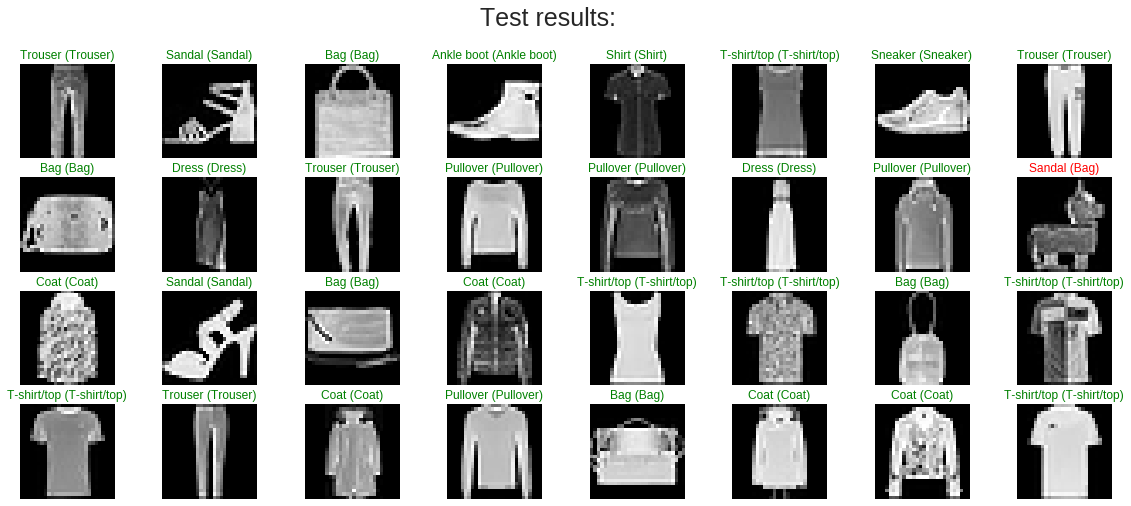

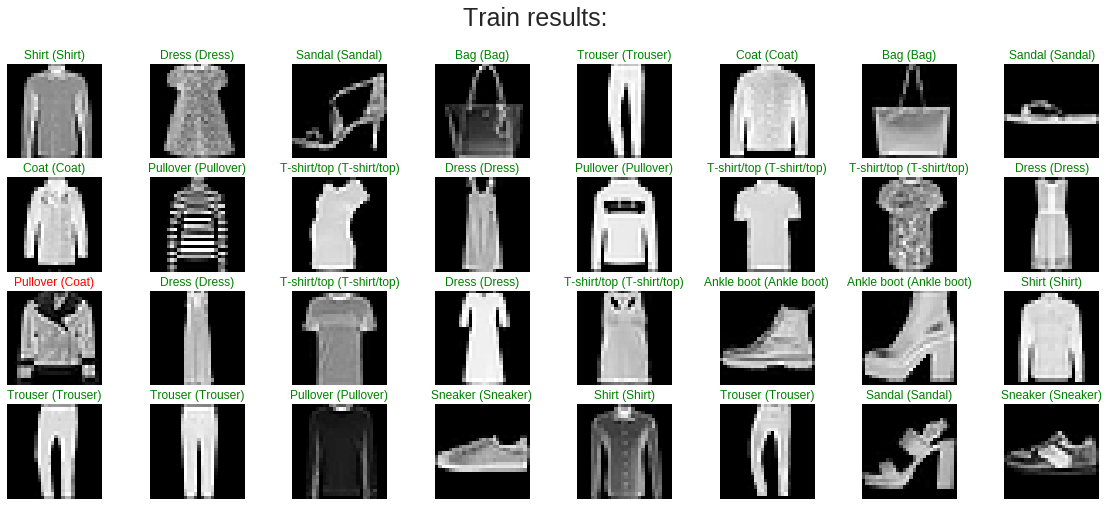

In [133]:
visualize_model_predictions(model, x_test, y_test,'Test')
visualize_model_predictions(model, x_train, y_train, 'Train')

#Compute & compare train and test accuracies:


# 3 Regularization

Our model currently has a lot of degrees of freedom (it has a LOT of trainable parameters and can therefore fit almost any function if we just keep training for long enough). This means our network is also prone to overfitting. 

In this section, let's add dropout layers between the main parts of our network to avoid overfitting.
What is a good dropout rate?

**Extra:** To get an idea of the degree to which these networks can overfit take a look at this amazing paper which shows that a large enough CNN can basically memorize a very large, random dataset: https://arxiv.org/abs/1611.03530

**Extra:** Also try to add an L2 Regularization penalty to every layer in your network. What is a good setting of the multiplier constant? (see https://keras.io/regularizers/)

In [148]:
model = tf.keras.Sequential()

# Define the model:
model.add(tf.keras.layers.Conv2D(128, 4, 2,input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(32, 4, 2, padding='same',activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 13, 13, 128)       2176      
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 32)          65568     
_________________________________________________________________
flatten_15 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1568)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               200832    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

Train on 54000 samples, validate on 6000 samples
Epoch 1/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.6543 - acc: 0.7609
Epoch 00001: val_loss did not improve from 0.22800


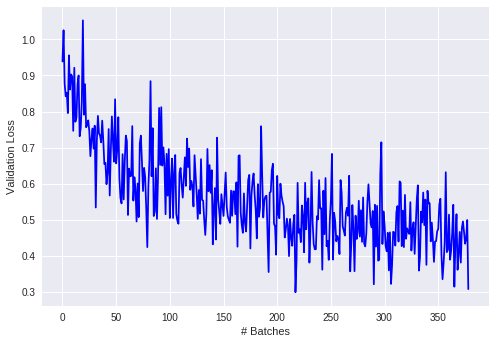

54000/54000 [==============================] - 8s 143us/step - loss: 0.6535 - acc: 0.7612 - val_loss: 0.4010 - val_acc: 0.8537
Epoch 2/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.4135 - acc: 0.8494
Epoch 00002: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 115us/step - loss: 0.4135 - acc: 0.8494 - val_loss: 0.3359 - val_acc: 0.8773
Epoch 3/125
53632/54000 [============================>.] - ETA: 0s - loss: 0.3611 - acc: 0.8689
Epoch 00003: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.3608 - acc: 0.8693 - val_loss: 0.3142 - val_acc: 0.8770
Epoch 4/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.3352 - acc: 0.8784
Epoch 00004: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.3351 - acc: 0.8785 - val_loss: 0.2915 - val_acc: 0.8903
Epoch 5/125
53632/54000 [==========================

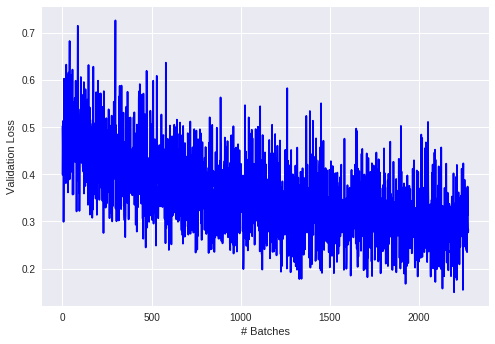

54000/54000 [==============================] - 6s 118us/step - loss: 0.2987 - acc: 0.8893 - val_loss: 0.2712 - val_acc: 0.8988
Epoch 7/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.2852 - acc: 0.8946
Epoch 00007: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.2851 - acc: 0.8946 - val_loss: 0.2609 - val_acc: 0.9010
Epoch 8/125
53504/54000 [============================>.] - ETA: 0s - loss: 0.2721 - acc: 0.8992
Epoch 00008: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.2720 - acc: 0.8993 - val_loss: 0.2575 - val_acc: 0.9003
Epoch 9/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.2630 - acc: 0.9023
Epoch 00009: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.2628 - acc: 0.9024 - val_loss: 0.2542 - val_acc: 0.9053
Epoch 10/125
53632/54000 [=========================

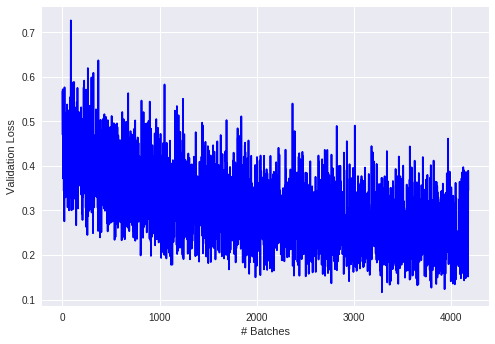

54000/54000 [==============================] - 6s 119us/step - loss: 0.2452 - acc: 0.9086 - val_loss: 0.2459 - val_acc: 0.9053
Epoch 12/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.2420 - acc: 0.9092
Epoch 00012: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.2423 - acc: 0.9091 - val_loss: 0.2341 - val_acc: 0.9103
Epoch 13/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.2349 - acc: 0.9119
Epoch 00013: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.2351 - acc: 0.9118 - val_loss: 0.2405 - val_acc: 0.9103
Epoch 14/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.2273 - acc: 0.9151
Epoch 00014: val_loss did not improve from 0.22800
54000/54000 [==============================] - 6s 114us/step - loss: 0.2274 - acc: 0.9151 - val_loss: 0.2385 - val_acc: 0.9127
Epoch 15/125
53632/54000 [======================

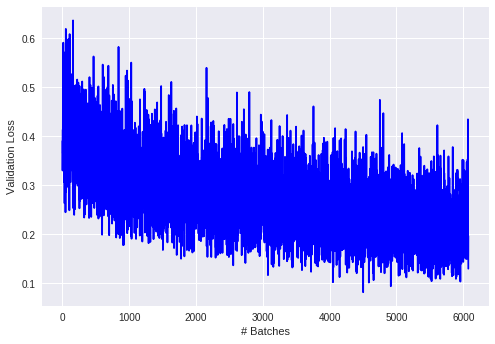

54000/54000 [==============================] - 7s 134us/step - loss: 0.2182 - acc: 0.9180 - val_loss: 0.2255 - val_acc: 0.9163
Epoch 17/125
53504/54000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9188
Epoch 00017: val_loss did not improve from 0.22554
54000/54000 [==============================] - 6s 114us/step - loss: 0.2137 - acc: 0.9189 - val_loss: 0.2346 - val_acc: 0.9127
Epoch 18/125
53632/54000 [============================>.] - ETA: 0s - loss: 0.2090 - acc: 0.9196
Epoch 00018: val_loss did not improve from 0.22554
54000/54000 [==============================] - 6s 114us/step - loss: 0.2093 - acc: 0.9196 - val_loss: 0.2336 - val_acc: 0.9162
Epoch 19/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.2038 - acc: 0.9237
Epoch 00019: val_loss did not improve from 0.22554
54000/54000 [==============================] - 6s 114us/step - loss: 0.2036 - acc: 0.9238 - val_loss: 0.2288 - val_acc: 0.9183
Epoch 20/125
53632/54000 [======================

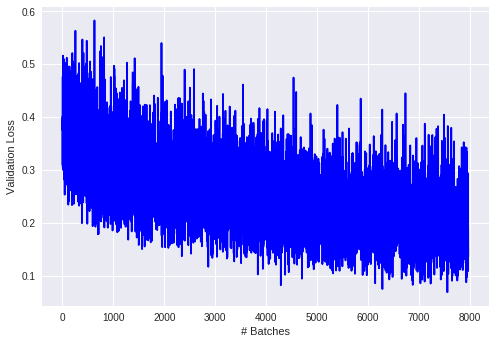

54000/54000 [==============================] - 6s 120us/step - loss: 0.1979 - acc: 0.9259 - val_loss: 0.2290 - val_acc: 0.9167
Epoch 22/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.1946 - acc: 0.9262
Epoch 00022: val_loss did not improve from 0.22554
54000/54000 [==============================] - 6s 114us/step - loss: 0.1945 - acc: 0.9262 - val_loss: 0.2351 - val_acc: 0.9173
Epoch 23/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.1911 - acc: 0.9280
Epoch 00023: val_loss did not improve from 0.22554
54000/54000 [==============================] - 6s 113us/step - loss: 0.1911 - acc: 0.9281 - val_loss: 0.2303 - val_acc: 0.9153
Epoch 24/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.1887 - acc: 0.9289
Epoch 00024: val_loss did not improve from 0.22554
54000/54000 [==============================] - 6s 114us/step - loss: 0.1887 - acc: 0.9290 - val_loss: 0.2257 - val_acc: 0.9193
Epoch 25/125
53632/54000 [======================

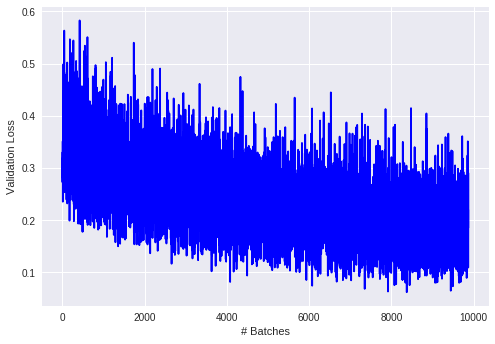

54000/54000 [==============================] - 7s 121us/step - loss: 0.1828 - acc: 0.9305 - val_loss: 0.2250 - val_acc: 0.9178
Epoch 27/125
53632/54000 [============================>.] - ETA: 0s - loss: 0.1790 - acc: 0.9313
Epoch 00027: val_loss did not improve from 0.22500
54000/54000 [==============================] - 6s 115us/step - loss: 0.1791 - acc: 0.9312 - val_loss: 0.2318 - val_acc: 0.9172
Epoch 28/125
53504/54000 [============================>.] - ETA: 0s - loss: 0.1775 - acc: 0.9310
Epoch 00028: val_loss did not improve from 0.22500
54000/54000 [==============================] - 6s 114us/step - loss: 0.1773 - acc: 0.9311 - val_loss: 0.2301 - val_acc: 0.9200
Epoch 29/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.1753 - acc: 0.9343
Epoch 00029: val_loss did not improve from 0.22500
54000/54000 [==============================] - 6s 114us/step - loss: 0.1753 - acc: 0.9342 - val_loss: 0.2256 - val_acc: 0.9185
Epoch 30/125
53760/54000 [======================

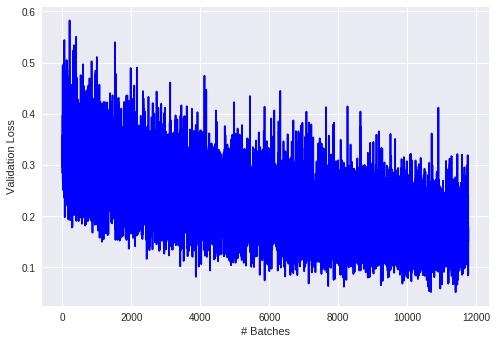

54000/54000 [==============================] - 6s 120us/step - loss: 0.1698 - acc: 0.9359 - val_loss: 0.2283 - val_acc: 0.9200
Epoch 32/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.1657 - acc: 0.9363
Epoch 00032: val_loss did not improve from 0.22124
54000/54000 [==============================] - 6s 114us/step - loss: 0.1656 - acc: 0.9363 - val_loss: 0.2333 - val_acc: 0.9202
Epoch 33/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.1692 - acc: 0.9357
Epoch 00033: val_loss did not improve from 0.22124
54000/54000 [==============================] - 6s 114us/step - loss: 0.1691 - acc: 0.9357 - val_loss: 0.2253 - val_acc: 0.9198
Epoch 34/125
53760/54000 [============================>.] - ETA: 0s - loss: 0.1636 - acc: 0.9378
Epoch 00034: val_loss did not improve from 0.22124
54000/54000 [==============================] - 6s 114us/step - loss: 0.1638 - acc: 0.9378 - val_loss: 0.2340 - val_acc: 0.9207
Epoch 35/125
53760/54000 [======================

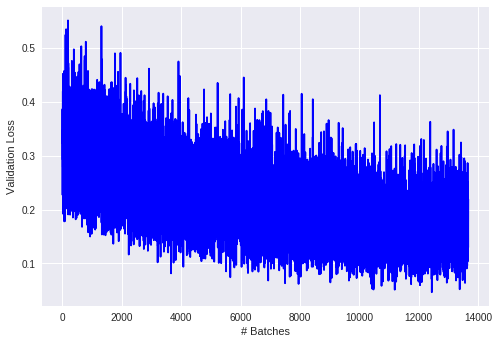

54000/54000 [==============================] - 7s 121us/step - loss: 0.1602 - acc: 0.9390 - val_loss: 0.2308 - val_acc: 0.9183
Epoch 37/125
53504/54000 [============================>.] - ETA: 0s - loss: 0.1593 - acc: 0.9395
Epoch 00037: val_loss did not improve from 0.22124
54000/54000 [==============================] - 6s 114us/step - loss: 0.1592 - acc: 0.9395 - val_loss: 0.2366 - val_acc: 0.9197
Epoch 38/125
53632/54000 [============================>.] - ETA: 0s - loss: 0.1544 - acc: 0.9412
Epoch 00038: val_loss did not improve from 0.22124
54000/54000 [==============================] - 6s 114us/step - loss: 0.1545 - acc: 0.9413 - val_loss: 0.2357 - val_acc: 0.9238
Epoch 39/125
53888/54000 [============================>.] - ETA: 0s - loss: 0.1544 - acc: 0.9407
Epoch 00039: val_loss did not improve from 0.22124
54000/54000 [==============================] - 6s 114us/step - loss: 0.1543 - acc: 0.9407 - val_loss: 0.2314 - val_acc: 0.9190
Epoch 40/125
53504/54000 [======================

In [149]:
callbacks_list = [checkpointer, plot_train_progress_cb, earlyStopping]

model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=125,
         validation_data=(x_valid, y_valid),
         callbacks=callbacks_list)

## Evaluate model:

In [150]:
model.load_weights('model.weights.best.hdf5')

test_score = model.evaluate(x_test, y_test, verbose=0)
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy: %.2f%% || Test accuracy: %.2f%%' %(100*train_score[1], 100*test_score[1]))

Train accuracy: 96.68% || Test accuracy: 91.88%


# 4 Data Augmentation
In the real world, getting enough training data is often a problem. To show the effect of this, training your architecture from above using only 100 training images, what is the best test-accuracy you can get now?

In [174]:
model = tf.keras.Sequential()

# You can use the previous model architecture:
model.add(tf.keras.layers.Conv2D(128, 4, 2,input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(32, 4, 2, padding='same',activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 13, 13, 128)       2176      
_________________________________________________________________
dropout_19 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 32)          65568     
_________________________________________________________________
flatten_19 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 1568)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               200832    
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
__________

Train on 100 samples, validate on 6000 samples
Epoch 1/50
 32/100 [========>.....................] - ETA: 3s - loss: 2.2932 - acc: 0.1875
Epoch 00001: val_loss improved from inf to 2.25781, saving model to model.weights.best.hdf5


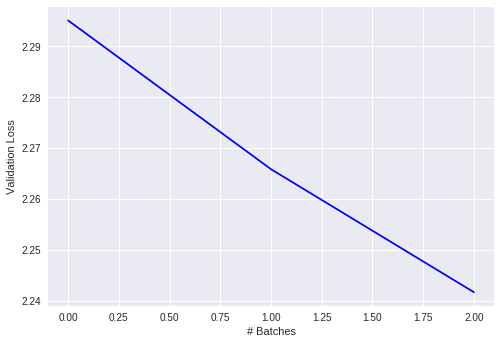

100/100 [==============================] - 4s 38ms/step - loss: 2.2830 - acc: 0.1700 - val_loss: 2.2578 - val_acc: 0.3097
Epoch 2/50
 32/100 [========>.....................] - ETA: 0s - loss: 2.2520 - acc: 0.2188
Epoch 00002: val_loss improved from 2.25781 to 2.16363, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 2.2274 - acc: 0.2500 - val_loss: 2.1636 - val_acc: 0.2552
Epoch 3/50
 32/100 [========>.....................] - ETA: 0s - loss: 2.1917 - acc: 0.2500
Epoch 00003: val_loss improved from 2.16363 to 2.03951, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 2.1027 - acc: 0.2700 - val_loss: 2.0395 - val_acc: 0.2265
Epoch 4/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.9640 - acc: 0.2812
Epoch 00004: val_loss improved from 2.03951 to 1.89142, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 1.9680 - acc

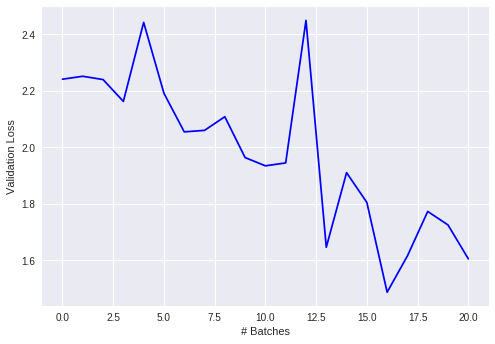

100/100 [==============================] - 1s 9ms/step - loss: 1.7008 - acc: 0.3900 - val_loss: 1.6042 - val_acc: 0.4280
Epoch 7/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.5661 - acc: 0.4375
Epoch 00007: val_loss improved from 1.60419 to 1.44572, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 1.6235 - acc: 0.3500 - val_loss: 1.4457 - val_acc: 0.4715
Epoch 8/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.4464 - acc: 0.4375
Epoch 00008: val_loss improved from 1.44572 to 1.37963, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 1.4821 - acc: 0.4400 - val_loss: 1.3796 - val_acc: 0.4478
Epoch 9/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.5372 - acc: 0.5000
Epoch 00009: val_loss improved from 1.37963 to 1.34004, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 1.2592 - acc:

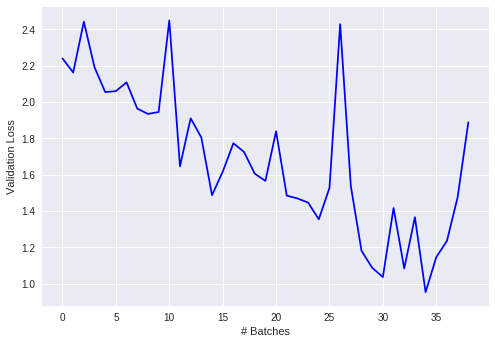

100/100 [==============================] - 1s 9ms/step - loss: 1.3097 - acc: 0.4800 - val_loss: 1.1790 - val_acc: 0.5673
Epoch 12/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.3848 - acc: 0.5312
Epoch 00012: val_loss improved from 1.17898 to 1.16087, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 1.2360 - acc: 0.5100 - val_loss: 1.1609 - val_acc: 0.5715
Epoch 13/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.2503 - acc: 0.5312
Epoch 00013: val_loss improved from 1.16087 to 1.10938, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 1.1171 - acc: 0.5800 - val_loss: 1.1094 - val_acc: 0.5773
Epoch 14/50
 32/100 [========>.....................] - ETA: 0s - loss: 1.1030 - acc: 0.5000
Epoch 00014: val_loss improved from 1.10938 to 1.00892, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.9862 - a

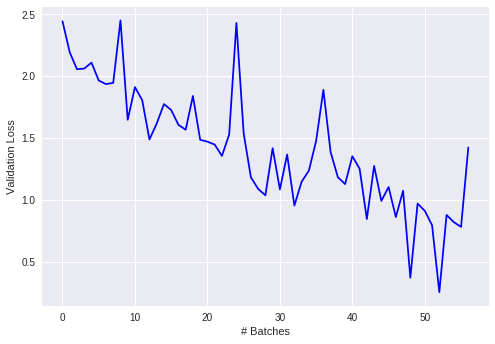

100/100 [==============================] - 1s 9ms/step - loss: 0.8491 - acc: 0.6400 - val_loss: 0.8924 - val_acc: 0.6788
Epoch 17/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.5718 - acc: 0.8750
Epoch 00017: val_loss improved from 0.89237 to 0.88629, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.7110 - acc: 0.7900 - val_loss: 0.8863 - val_acc: 0.6890
Epoch 18/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.5954 - acc: 0.8438
Epoch 00018: val_loss improved from 0.88629 to 0.86585, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.7490 - acc: 0.7400 - val_loss: 0.8658 - val_acc: 0.6970
Epoch 19/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.5905 - acc: 0.7812
Epoch 00019: val_loss did not improve from 0.86585
100/100 [==============================] - 1s 7ms/step - loss: 0.6732 - acc: 0.8100 - val_loss: 0.9266 - val_acc: 0.67

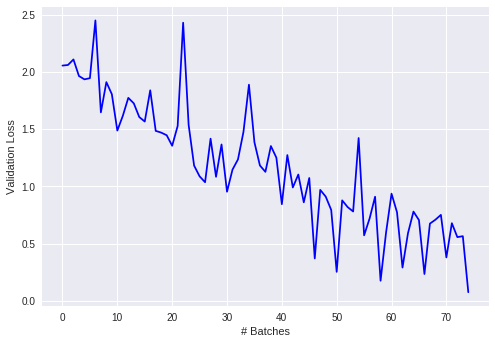

100/100 [==============================] - 1s 9ms/step - loss: 0.5784 - acc: 0.7800 - val_loss: 0.8975 - val_acc: 0.7057
Epoch 22/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.6527 - acc: 0.7500
Epoch 00022: val_loss improved from 0.86585 to 0.85800, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.5770 - acc: 0.7800 - val_loss: 0.8580 - val_acc: 0.7048
Epoch 23/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.5267 - acc: 0.8438
Epoch 00023: val_loss did not improve from 0.85800
100/100 [==============================] - 1s 6ms/step - loss: 0.5827 - acc: 0.8200 - val_loss: 0.9381 - val_acc: 0.6712
Epoch 24/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.4459 - acc: 0.6875
Epoch 00024: val_loss improved from 0.85800 to 0.85581, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.4908 - acc: 0.8100 - val_loss: 0.8558 - val_acc: 0.72

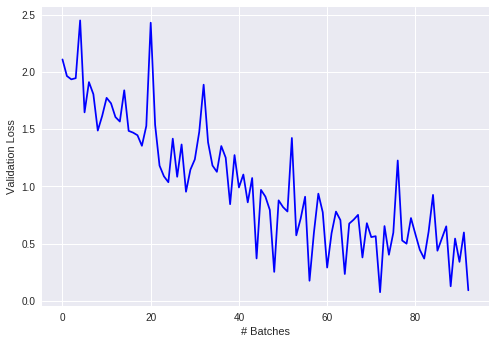

100/100 [==============================] - 1s 8ms/step - loss: 0.4773 - acc: 0.8200 - val_loss: 0.9075 - val_acc: 0.7140
Epoch 27/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.5660 - acc: 0.8125
Epoch 00027: val_loss improved from 0.85581 to 0.82892, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.4669 - acc: 0.8600 - val_loss: 0.8289 - val_acc: 0.7268
Epoch 28/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.3481 - acc: 0.8750
Epoch 00028: val_loss improved from 0.82892 to 0.79938, saving model to model.weights.best.hdf5
100/100 [==============================] - 1s 7ms/step - loss: 0.3636 - acc: 0.9000 - val_loss: 0.7994 - val_acc: 0.7315
Epoch 29/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.4844 - acc: 0.8125
Epoch 00029: val_loss did not improve from 0.79938
100/100 [==============================] - 1s 6ms/step - loss: 0.3659 - acc: 0.8700 - val_loss: 0.8124 - val_acc: 0.73

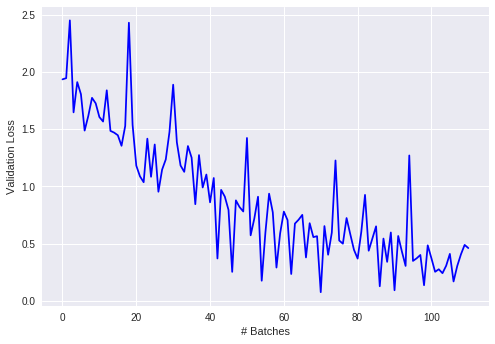

100/100 [==============================] - 1s 8ms/step - loss: 0.4016 - acc: 0.8300 - val_loss: 0.8906 - val_acc: 0.7292
Epoch 32/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.1464 - acc: 0.9688
Epoch 00032: val_loss did not improve from 0.79938
100/100 [==============================] - 1s 7ms/step - loss: 0.2786 - acc: 0.9100 - val_loss: 0.9856 - val_acc: 0.7007
Epoch 33/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.3861 - acc: 0.9062
Epoch 00033: val_loss did not improve from 0.79938
100/100 [==============================] - 1s 7ms/step - loss: 0.4154 - acc: 0.8700 - val_loss: 1.0937 - val_acc: 0.6780
Epoch 34/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.3610 - acc: 0.8750
Epoch 00034: val_loss did not improve from 0.79938
100/100 [==============================] - 1s 7ms/step - loss: 0.4647 - acc: 0.8300 - val_loss: 0.9692 - val_acc: 0.7032
Epoch 35/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.3041 - acc: 0.

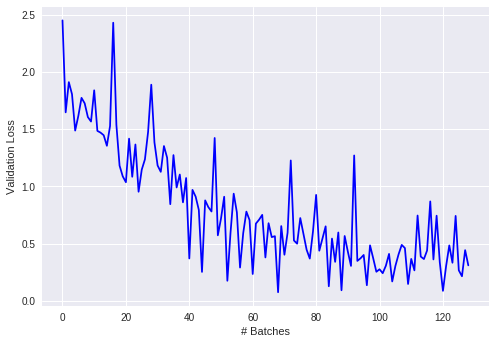

100/100 [==============================] - 1s 9ms/step - loss: 0.3075 - acc: 0.8700 - val_loss: 0.9913 - val_acc: 0.6983
Epoch 37/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.6754 - acc: 0.8125
Epoch 00037: val_loss did not improve from 0.79938
100/100 [==============================] - 1s 7ms/step - loss: 0.4031 - acc: 0.8800 - val_loss: 0.8359 - val_acc: 0.7285
Epoch 38/50
 32/100 [========>.....................] - ETA: 0s - loss: 0.4151 - acc: 0.8438
Epoch 00038: val_loss did not improve from 0.79938
100/100 [==============================] - 1s 7ms/step - loss: 0.3516 - acc: 0.8800 - val_loss: 0.9061 - val_acc: 0.7192
Epoch 00038: early stopping


In [175]:
nr_samples_to_use = 100
batch_size = 32

callbacks_list = [checkpointer, plot_train_progress_cb, earlyStopping]

model.fit(x_train[:nr_samples_to_use],
         y_train[:nr_samples_to_use],
         batch_size=batch_size,
         epochs=50,
         validation_data=(x_valid, y_valid),
         callbacks=callbacks_list)

In [176]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy: %.2f%%' %(100*score[1]))

Test accuracy: 71.46%


## Lets augment our small Training-dataset at runtime using an ImageDataGenerator():
See https://keras.io/preprocessing/image/

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

standardize_features = False

train_datagen = ImageDataGenerator(
        featurewise_center=standardize_features,
        featurewise_std_normalization=standardize_features,
        rotation_range=25,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.05,
        zoom_range=0.3,
        horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
validation_datagen = ImageDataGenerator(featurewise_center=standardize_features, featurewise_std_normalization=standardize_features)
test_datagen = ImageDataGenerator(featurewise_center=standardize_features, featurewise_std_normalization=standardize_features)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(x_train)
validation_datagen.fit(x_valid)
test_datagen.fit(x_test)


## Plot a few batches of augmented images to check the result of your Data Augmentation parameters
Make sure you can still classify every augmented image yourself!

Augmented Images, batch 1:


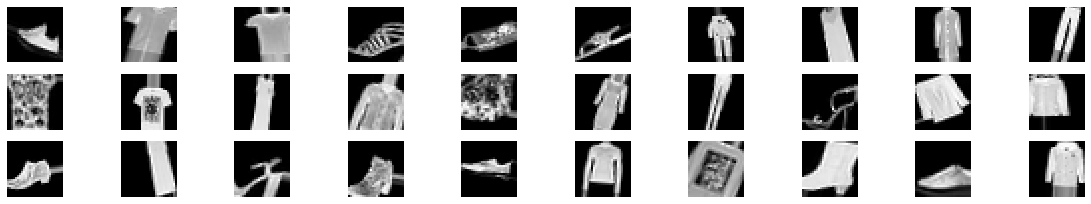

Augmented Images, batch 2:


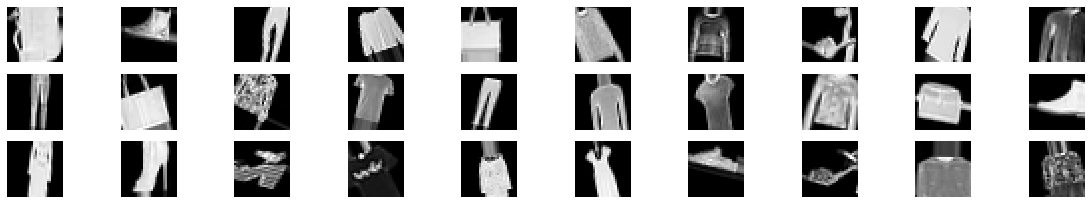

Augmented Images, batch 3:


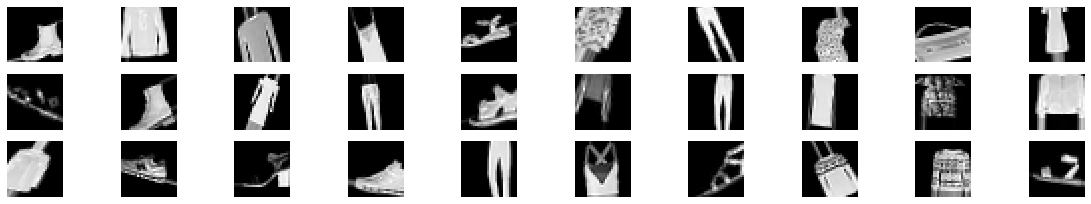

In [178]:
def plot_batch(images, batch_id):
    assert len(images) >= 30
    figure = plt.figure(figsize=(20, 3.5))
    
    for i, index in enumerate(np.random.choice(images.shape[0], size=30, replace=False)):
        ax = figure.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[index]), cmap = 'gray')
    print("Augmented Images, batch %d:" %(batch_id+1))
    plt.show()
    
batches_to_plot, i = 3, 0
    
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=32):
    plot_batch(x_batch, i)
    i += 1
    if i == batches_to_plot: break


## Use the ImageDataGenerator to augment the small Train-subset at runtime.
What test-accuracy do you get now?

In [182]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(128, 4, 2,input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(32, 4, 2, padding='same',activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 13, 13, 128)       2176      
_________________________________________________________________
dropout_25 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 32)          65568     
_________________________________________________________________
flatten_21 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 1568)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               200832    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
__________

Epoch 1/100
1/3 [=========>....................] - ETA: 4s - loss: 2.3565 - acc: 0.0000e+00
Epoch 00001: val_loss did not improve from 0.79938


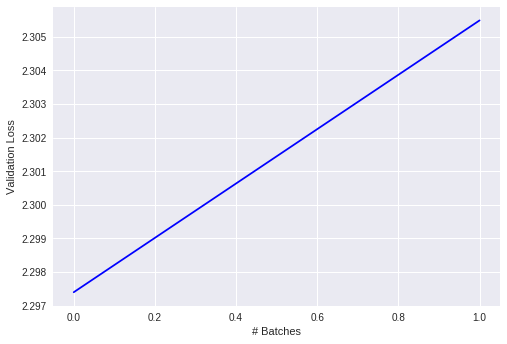

3/3 [==============================] - 4s 1s/step - loss: 2.3160 - acc: 0.0460 - val_loss: 2.2969 - val_acc: 0.1265
Epoch 2/100
2/3 [===================>..........] - ETA: 0s - loss: 2.2933 - acc: 0.1406
Epoch 00002: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 713ms/step - loss: 2.2930 - acc: 0.1250 - val_loss: 2.2856 - val_acc: 0.1028
Epoch 3/100
2/3 [===================>..........] - ETA: 0s - loss: 2.2465 - acc: 0.2031
Epoch 00003: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 686ms/step - loss: 2.2538 - acc: 0.1811 - val_loss: 2.2894 - val_acc: 0.1010
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 2.2899 - acc: 0.1250
Epoch 00004: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 675ms/step - loss: 2.2653 - acc: 0.1264 - val_loss: 2.2942 - val_acc: 0.1298
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 2.2418 - acc: 0.1875
Epoch 00005: val_loss 

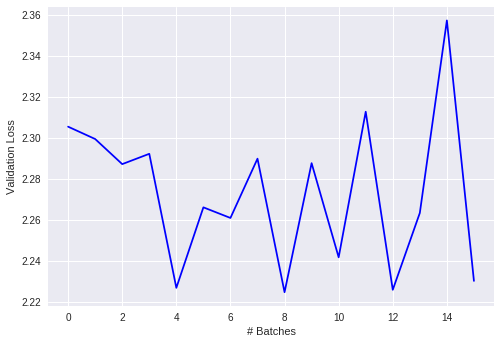

3/3 [==============================] - 2s 763ms/step - loss: 2.2837 - acc: 0.1667 - val_loss: 2.2668 - val_acc: 0.1460
Epoch 7/100
1/3 [=========>....................] - ETA: 0s - loss: 2.5702 - acc: 0.0000e+00
Epoch 00007: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 685ms/step - loss: 2.3005 - acc: 0.1494 - val_loss: 2.2458 - val_acc: 0.1133
Epoch 8/100
1/3 [=========>....................] - ETA: 0s - loss: 2.2761 - acc: 0.1562
Epoch 00008: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 673ms/step - loss: 2.1931 - acc: 0.3134 - val_loss: 2.2378 - val_acc: 0.1818
Epoch 9/100
1/3 [=========>....................] - ETA: 0s - loss: 2.2873 - acc: 0.0938
Epoch 00009: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 500ms/step - loss: 2.2318 - acc: 0.0689 - val_loss: 2.2315 - val_acc: 0.1888
Epoch 10/100
2/3 [===================>..........] - ETA: 0s - loss: 2.1819 - acc: 0.1719
Epoch 00010: v

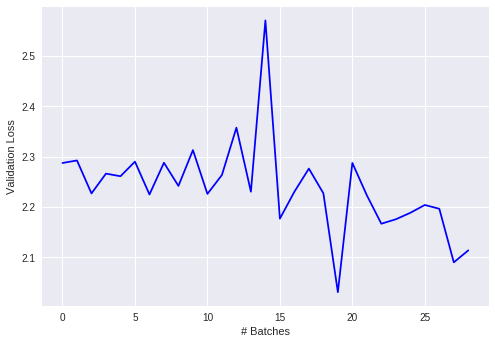

3/3 [==============================] - 2s 760ms/step - loss: 2.1379 - acc: 0.2040 - val_loss: 2.2392 - val_acc: 0.1360
Epoch 12/100
1/3 [=========>....................] - ETA: 0s - loss: 2.2249 - acc: 0.1875
Epoch 00012: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 692ms/step - loss: 2.2371 - acc: 0.1149 - val_loss: 2.2224 - val_acc: 0.1263
Epoch 13/100
1/3 [=========>....................] - ETA: 0s - loss: 2.2396 - acc: 0.2188
Epoch 00013: val_loss did not improve from 0.79938
3/3 [==============================] - 1s 498ms/step - loss: 2.1513 - acc: 0.1771 - val_loss: 2.1874 - val_acc: 0.1170
Epoch 14/100
2/3 [===================>..........] - ETA: 0s - loss: 2.1928 - acc: 0.0781    
Epoch 00014: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 709ms/step - loss: 2.2192 - acc: 0.0804 - val_loss: 2.1537 - val_acc: 0.1350
Epoch 15/100
1/3 [=========>....................] - ETA: 0s - loss: 1.8320 - acc: 0.0000e+00
Epoch 0

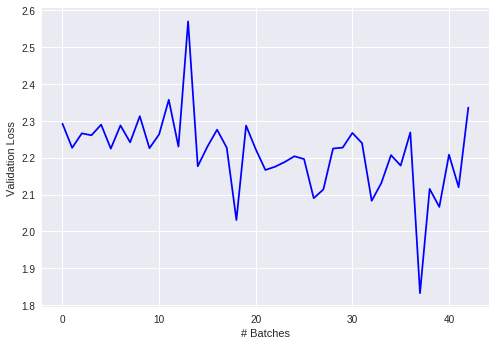

3/3 [==============================] - 2s 752ms/step - loss: 2.2096 - acc: 0.1034 - val_loss: 2.1055 - val_acc: 0.3073
Epoch 17/100
1/3 [=========>....................] - ETA: 0s - loss: 2.0894 - acc: 0.2500
Epoch 00017: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 505ms/step - loss: 2.0616 - acc: 0.2292 - val_loss: 2.0908 - val_acc: 0.3147
Epoch 18/100
2/3 [===================>..........] - ETA: 0s - loss: 2.1441 - acc: 0.1094    
Epoch 00018: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 702ms/step - loss: 2.1794 - acc: 0.0984 - val_loss: 2.0804 - val_acc: 0.2333
Epoch 19/100
1/3 [=========>....................] - ETA: 0s - loss: 2.1388 - acc: 0.1562
Epoch 00019: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 698ms/step - loss: 2.0798 - acc: 0.2083 - val_loss: 2.0644 - val_acc: 0.2182
Epoch 20/100
1/3 [=========>....................] - ETA: 0s - loss: 2.1667 - acc: 0.1562
Epoch 00020

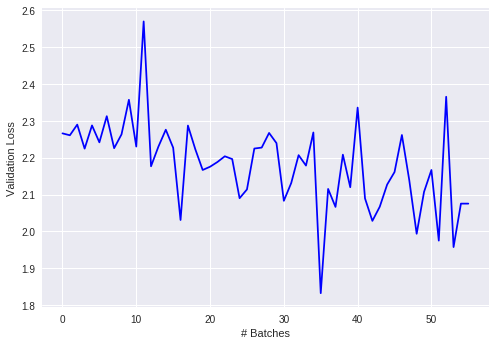

3/3 [==============================] - 2s 575ms/step - loss: 2.0360 - acc: 0.2083 - val_loss: 2.0283 - val_acc: 0.3245
Epoch 22/100
2/3 [===================>..........] - ETA: 0s - loss: 2.1339 - acc: 0.1406    
Epoch 00022: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 693ms/step - loss: 2.0812 - acc: 0.1953 - val_loss: 2.0325 - val_acc: 0.3300
Epoch 23/100
1/3 [=========>....................] - ETA: 0s - loss: 2.0774 - acc: 0.2812
Epoch 00023: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 693ms/step - loss: 2.1416 - acc: 0.3021 - val_loss: 2.0598 - val_acc: 0.2990
Epoch 24/100
1/3 [=========>....................] - ETA: 0s - loss: 2.1095 - acc: 0.2500
Epoch 00024: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 706ms/step - loss: 2.2049 - acc: 0.2040 - val_loss: 2.0728 - val_acc: 0.3098
Epoch 25/100
1/3 [=========>....................] - ETA: 0s - loss: 2.1609 - acc: 0.2500
Epoch 00025

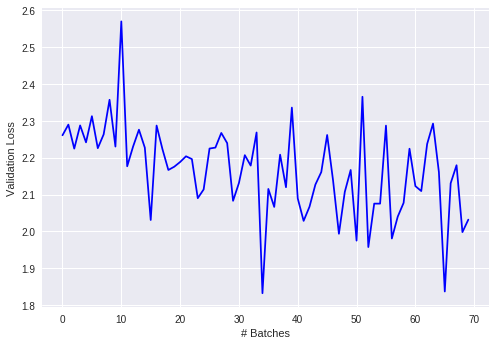

3/3 [==============================] - 2s 768ms/step - loss: 2.0737 - acc: 0.2845 - val_loss: 1.9823 - val_acc: 0.3528
Epoch 27/100
1/3 [=========>....................] - ETA: 0s - loss: 1.9044 - acc: 0.4062
Epoch 00027: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 714ms/step - loss: 1.9616 - acc: 0.3333 - val_loss: 1.9492 - val_acc: 0.3673
Epoch 28/100
1/3 [=========>....................] - ETA: 0s - loss: 2.3051 - acc: 0.2500
Epoch 00028: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 675ms/step - loss: 2.0345 - acc: 0.3074 - val_loss: 1.9006 - val_acc: 0.3905
Epoch 29/100
1/3 [=========>....................] - ETA: 0s - loss: 2.6344 - acc: 0.0000e+00
Epoch 00029: val_loss did not improve from 0.79938
3/3 [==============================] - 1s 497ms/step - loss: 2.0294 - acc: 0.2757 - val_loss: 1.8714 - val_acc: 0.4010
Epoch 30/100
2/3 [===================>..........] - ETA: 0s - loss: 1.9519 - acc: 0.2812
Epoch 00030

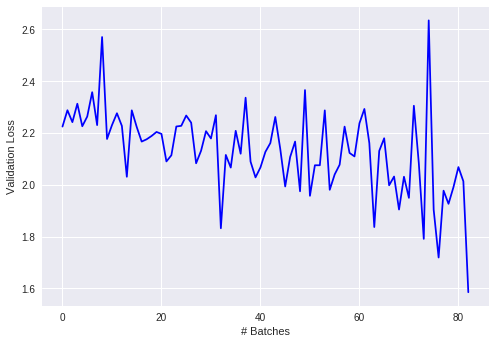

3/3 [==============================] - 2s 749ms/step - loss: 1.9204 - acc: 0.4437 - val_loss: 1.8044 - val_acc: 0.4565
Epoch 32/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7475 - acc: 0.4062
Epoch 00032: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 677ms/step - loss: 1.8918 - acc: 0.2812 - val_loss: 1.7646 - val_acc: 0.4725
Epoch 33/100
1/3 [=========>....................] - ETA: 0s - loss: 1.8685 - acc: 0.2812
Epoch 00033: val_loss did not improve from 0.79938
3/3 [==============================] - 1s 496ms/step - loss: 1.8387 - acc: 0.2845 - val_loss: 1.7239 - val_acc: 0.4637
Epoch 34/100
2/3 [===================>..........] - ETA: 0s - loss: 1.6970 - acc: 0.3125
Epoch 00034: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 688ms/step - loss: 1.6910 - acc: 0.3125 - val_loss: 1.7186 - val_acc: 0.4715
Epoch 35/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1794 - acc: 0.7500
Epoch 00035: va

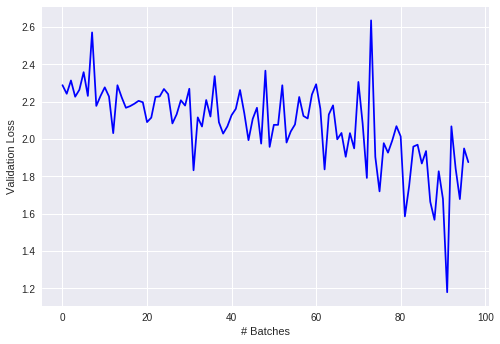

3/3 [==============================] - 2s 757ms/step - loss: 1.8502 - acc: 0.3419 - val_loss: 1.6882 - val_acc: 0.4945
Epoch 37/100
1/3 [=========>....................] - ETA: 0s - loss: 1.6387 - acc: 0.3125
Epoch 00037: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 503ms/step - loss: 1.5496 - acc: 0.3736 - val_loss: 1.6589 - val_acc: 0.4942
Epoch 38/100
2/3 [===================>..........] - ETA: 0s - loss: 1.8127 - acc: 0.3906
Epoch 00038: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 714ms/step - loss: 1.8700 - acc: 0.4196 - val_loss: 1.5854 - val_acc: 0.5155
Epoch 39/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7636 - acc: 0.4062
Epoch 00039: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 686ms/step - loss: 1.6146 - acc: 0.4583 - val_loss: 1.5667 - val_acc: 0.4628
Epoch 40/100
1/3 [=========>....................] - ETA: 0s - loss: 1.5641 - acc: 0.2500
Epoch 00040: va

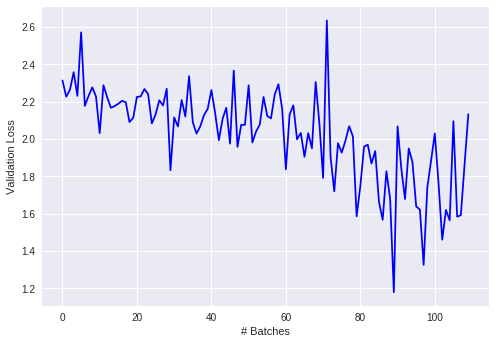

3/3 [==============================] - 2s 569ms/step - loss: 1.8353 - acc: 0.2872 - val_loss: 1.5544 - val_acc: 0.5085
Epoch 42/100
2/3 [===================>..........] - ETA: 0s - loss: 1.9021 - acc: 0.1562
Epoch 00042: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 716ms/step - loss: 1.8168 - acc: 0.2528 - val_loss: 1.6290 - val_acc: 0.4218
Epoch 43/100
1/3 [=========>....................] - ETA: 0s - loss: 1.8814 - acc: 0.3438
Epoch 00043: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 697ms/step - loss: 1.6113 - acc: 0.4168 - val_loss: 1.6421 - val_acc: 0.4315
Epoch 44/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7259 - acc: 0.3750
Epoch 00044: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 677ms/step - loss: 1.6762 - acc: 0.4375 - val_loss: 1.6069 - val_acc: 0.4937
Epoch 45/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7369 - acc: 0.3125
Epoch 00045: va

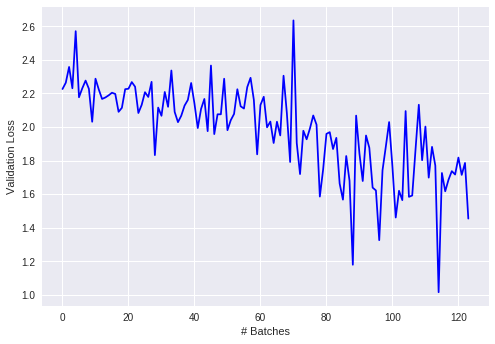

3/3 [==============================] - 2s 782ms/step - loss: 1.6515 - acc: 0.3854 - val_loss: 1.5423 - val_acc: 0.5320
Epoch 47/100
2/3 [===================>..........] - ETA: 0s - loss: 1.6504 - acc: 0.3906
Epoch 00047: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 686ms/step - loss: 1.7897 - acc: 0.3277 - val_loss: 1.5246 - val_acc: 0.4933
Epoch 48/100
1/3 [=========>....................] - ETA: 0s - loss: 1.3481 - acc: 0.5000
Epoch 00048: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 676ms/step - loss: 1.5255 - acc: 0.2987 - val_loss: 1.5345 - val_acc: 0.4502
Epoch 49/100
1/3 [=========>....................] - ETA: 0s - loss: 1.5641 - acc: 0.2500
Epoch 00049: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 501ms/step - loss: 1.6137 - acc: 0.3879 - val_loss: 1.5505 - val_acc: 0.4532
Epoch 50/100
2/3 [===================>..........] - ETA: 0s - loss: 1.6238 - acc: 0.3594
Epoch 00050: va

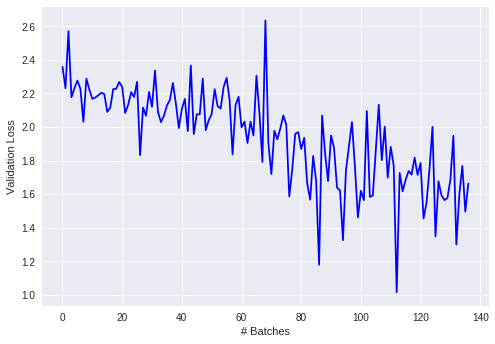

3/3 [==============================] - 2s 780ms/step - loss: 1.6422 - acc: 0.3750 - val_loss: 1.4812 - val_acc: 0.5422
Epoch 52/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7780 - acc: 0.4375
Epoch 00052: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 689ms/step - loss: 1.5545 - acc: 0.4426 - val_loss: 1.4799 - val_acc: 0.5418
Epoch 53/100
1/3 [=========>....................] - ETA: 0s - loss: 1.6236 - acc: 0.4062
Epoch 00053: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 502ms/step - loss: 1.5815 - acc: 0.4479 - val_loss: 1.4547 - val_acc: 0.5388
Epoch 54/100
2/3 [===================>..........] - ETA: 0s - loss: 1.2162 - acc: 0.6719
Epoch 00054: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 692ms/step - loss: 1.3954 - acc: 0.5422 - val_loss: 1.3809 - val_acc: 0.5637
Epoch 55/100
1/3 [=========>....................] - ETA: 0s - loss: 1.5263 - acc: 0.5000
Epoch 00055: va

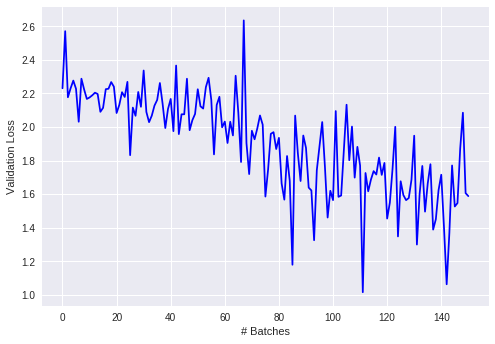

3/3 [==============================] - 2s 758ms/step - loss: 1.7261 - acc: 0.3764 - val_loss: 1.3239 - val_acc: 0.5585
Epoch 57/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7800 - acc: 0.4062
Epoch 00057: val_loss did not improve from 0.79938
3/3 [==============================] - 1s 498ms/step - loss: 1.6707 - acc: 0.4688 - val_loss: 1.3250 - val_acc: 0.5552
Epoch 58/100
2/3 [===================>..........] - ETA: 0s - loss: 1.0948 - acc: 0.6562
Epoch 00058: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 693ms/step - loss: 1.2784 - acc: 0.5281 - val_loss: 1.3366 - val_acc: 0.5432
Epoch 59/100
1/3 [=========>....................] - ETA: 0s - loss: 1.6613 - acc: 0.3438
Epoch 00059: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 689ms/step - loss: 1.6751 - acc: 0.3958 - val_loss: 1.3659 - val_acc: 0.5163
Epoch 60/100
1/3 [=========>....................] - ETA: 0s - loss: 0.9783 - acc: 0.5000
Epoch 00060: va

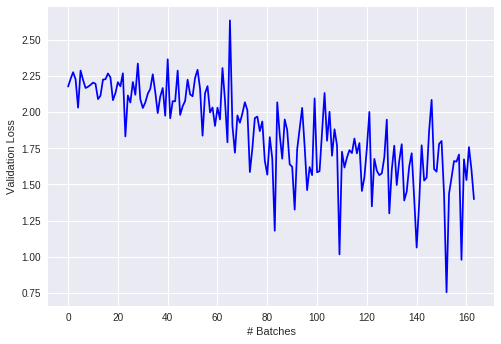

3/3 [==============================] - 2s 584ms/step - loss: 1.6056 - acc: 0.4426 - val_loss: 1.3441 - val_acc: 0.5357
Epoch 62/100
2/3 [===================>..........] - ETA: 0s - loss: 1.3572 - acc: 0.2812
Epoch 00062: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 690ms/step - loss: 1.4772 - acc: 0.3562 - val_loss: 1.3522 - val_acc: 0.5278
Epoch 63/100
1/3 [=========>....................] - ETA: 0s - loss: 1.1559 - acc: 0.4688
Epoch 00063: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 700ms/step - loss: 1.4273 - acc: 0.4479 - val_loss: 1.3551 - val_acc: 0.5113
Epoch 64/100
1/3 [=========>....................] - ETA: 0s - loss: 1.3924 - acc: 0.4375
Epoch 00064: val_loss did not improve from 0.79938
3/3 [==============================] - 2s 682ms/step - loss: 1.3337 - acc: 0.4885 - val_loss: 1.3891 - val_acc: 0.5093
Epoch 65/100
1/3 [=========>....................] - ETA: 0s - loss: 1.7245 - acc: 0.2812
Epoch 00065: va

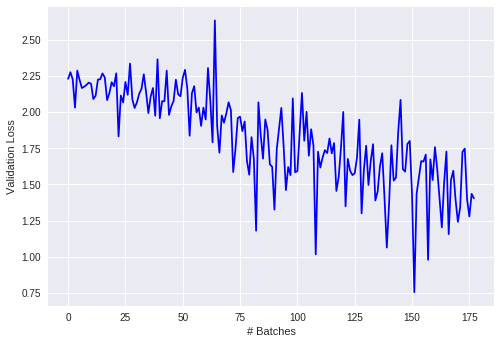

3/3 [==============================] - 2s 781ms/step - loss: 1.3816 - acc: 0.5202 - val_loss: 1.4015 - val_acc: 0.5357
Epoch 00066: early stopping


In [183]:
callbacks_list = [checkpointer, plot_train_progress_cb, earlyStopping]

# fits the model on batches with real-time data augmentation:
model.fit_generator(generator = train_datagen.flow(x_train[:nr_samples_to_use], y_train[:nr_samples_to_use], batch_size=batch_size),
                    validation_data = validation_datagen.flow(x_valid, y_valid, batch_size=batch_size), 
                    steps_per_epoch = nr_samples_to_use // batch_size,
                    callbacks=callbacks_list,
                    use_multiprocessing=True,
                    workers=8,
                    epochs=100)

In [184]:
#model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy: %.2f%%' %(100*score[1]))

Test accuracy: 52.59%


In [0]:
## Note: Data Augmentation on Fashion-MNIST is not the most effective. 
## But the concept is very generally usefull for a lot of Deep Learning problems, hence the inclusion here!

# Final assignment
### Finally, throw everything together and try to get the best possible performance on the Test-set! Who will win?

For the Pro's, here are some additional tips:
* Try Batch-Normalization layers
* Play around with the Data Augmentation parameters a lot: augmenting data is good, but you don't want to push your training data distribution to far out (the test-data is not augmented!!) For example: sneakers, sandals and boots are always facing left in the Fashion-MNIST dataset, so random-horizontal flipping isn't the best option here...
* You could also experiment with some of the newer activation functions like LeakyReLU, SeLU, ...
* Cyclical learning rates
* ...